In [1]:
import string
import numpy as np
import matplotlib.pyplot as plt
import os
from prettytable import PrettyTable
from IPython.display import Latex
from keras.datasets import cifar10
import tensorflow as tf

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [2]:
seed = 99
np.random.seed(seed)
tf.set_random_seed(seed)
clean_data_size = 200

# Load the CIFAR10 data.
(x_train_, y_train_), (x_test, y_test) = cifar10.load_data()

# Seperate validation set
y_validation = y_train_[0:10000]
y_train = y_train_[10000:50000]

# Generate clean dataset
clean_index = []
for label in range(10):
    positive_index = list(np.where(y_train == label)[0])
    clean_index = np.append(clean_index, np.random.choice(positive_index, clean_data_size, replace=False)).astype(int)

y_train = np.delete(y_train, clean_index, axis=0)

In [3]:
print('Validation accuracy and (test accuracy) of pre-activation ResNet20 on CIFAR-10.')
lr_list = [0.01, 0.003, 0.001, 0.0003, 0.0001]
noise_list = [0, 0.3, 0.5, 0.7, 0.9]
table = PrettyTable([' ', 'noise=0%', '30%', '50%', '70%', '90%'])
for lr_i in range(len(lr_list)):
    test_acc = ['/' for _ in range(len(noise_list))]
    validation_acc = ['/' for _ in range(len(noise_list))]
    n = np.zeros(len(noise_list))
    for noise_j in range(len(noise_list)):
        dirs = 'saved_precision/benchmark_ResNet20_pre-activation_lr_%.4f_noise_%.1f'%(lr_list[lr_i], noise_list[noise_j])
        acc_t = []
        acc_v = []
        for i in range(5):
            if not os.path.exists(dirs + '/accuracy_file' + str(i) + '.txt'):
                continue
            else:
                file = open(dirs + '/accuracy_file' + str(i) + '.txt')
                lines = file.readlines()
                acc_t.append(float(lines[5]))
                acc_v.append(np.max(eval(lines[3])))
        if len(acc_t) > 0:
            test_acc[noise_j] = np.round(np.mean(acc_t), 3)
            validation_acc[noise_j] = np.round(np.mean(acc_v), 3)
            n[noise_j] = len(acc_t)
    table.add_row(['lr='+str(lr_list[lr_i])] + [str(validation_acc[i])+'('+str(test_acc[i])+'),'+str(int(n[i])) for i in range(len(noise_list))])
print(table)
 

Validation accuracy and (test accuracy) of pre-activation ResNet20 on CIFAR-10.
+-----------+----------------+----------------+----------------+----------------+----------------+
|           |    noise=0%    |      30%       |      50%       |      70%       |      90%       |
+-----------+----------------+----------------+----------------+----------------+----------------+
|  lr=0.01  |     /(/),0     | 0.636(0.641),1 | 0.515(0.512),1 | 0.243(0.241),1 |  0.103(0.1),1  |
|  lr=0.003 | 0.904(0.895),1 | 0.809(0.801),5 |  0.705(0.7),3  | 0.474(0.46),1  |  0.103(0.1),1  |
|  lr=0.001 | 0.921(0.914),3 | 0.799(0.793),2 | 0.732(0.726),5 | 0.569(0.563),5 | 0.18(0.181),1  |
| lr=0.0003 | 0.916(0.908),1 | 0.744(0.73),1  | 0.683(0.671),1 | 0.488(0.481),1 |  0.21(0.21),5  |
| lr=0.0001 |     /(/),0     |     /(/),0     |     /(/),0     |     /(/),0     | 0.172(0.172),1 |
+-----------+----------------+----------------+----------------+----------------+----------------+


In [3]:
for index in range(3):
    table = PrettyTable([' ', '0.3', '0.5', '0.7', '0.9'])
    for student_lambda in [0.1, 0.2, 0.6, 0.7, 0.8, 0.9, 0.95]:
        acc = []
        for noise in [0.3, 0.5, 0.7, 0.9]:        
            path = 'saved_precision/student_model1/noise_%.1f_lambda_%.2f_accuracy_file%d.txt' \
                    %(noise, student_lambda, index)
            try:
                file = open(path)
                lines = file.readlines()
                acc.append(np.round(eval(lines[5]), 3))
            except:
                acc.append('/')
                pass
        table.add_row([student_lambda] + acc)
    print(table)
                
    

+------+-------+-------+-----+-----+
|      |  0.3  |  0.5  | 0.7 | 0.9 |
+------+-------+-------+-----+-----+
| 0.1  |   /   |   /   |  /  |  /  |
| 0.2  |   /   |   /   |  /  |  /  |
| 0.6  |   /   |   /   |  /  |  /  |
| 0.7  |   /   |   /   |  /  |  /  |
| 0.8  |   /   | 0.681 |  /  |  /  |
| 0.9  | 0.729 |   /   |  /  |  /  |
| 0.95 |   /   |   /   |  /  |  /  |
+------+-------+-------+-----+-----+
+------+-------+-------+-----+-----+
|      |  0.3  |  0.5  | 0.7 | 0.9 |
+------+-------+-------+-----+-----+
| 0.1  |   /   |   /   |  /  |  /  |
| 0.2  |   /   |   /   |  /  |  /  |
| 0.6  |   /   |   /   |  /  |  /  |
| 0.7  |   /   | 0.652 |  /  |  /  |
| 0.8  | 0.698 | 0.659 |  /  |  /  |
| 0.9  | 0.708 |   /   |  /  |  /  |
| 0.95 |   /   |   /   |  /  |  /  |
+------+-------+-------+-----+-----+
+------+-------+-------+-------+-------+
|      |  0.3  |  0.5  |  0.7  |  0.9  |
+------+-------+-------+-------+-------+
| 0.1  |   /   |   /   |   /   | 0.642 |
| 0.2  |   /   |   /  

In [4]:
for positive_threshold in ['0.90', 0.95]:
    for add_criterion in [90, 95]:
        for learning_rate in [0.0001]:
            dirs = 'saved_precision/positive_threshold_'+str(positive_threshold)+'_add_criterion_'+str(add_criterion)+\
                    '_learning_rate_'+str(learning_rate) + '_new'
            if not os.path.exists(dirs):
                continue
            print('positive threshold: ', positive_threshold)
            print('add criterion: ', add_criterion)
            print('learning rate: ', learning_rate)
            validation_precision_matrix = [['/' for _ in range(10)] for _ in range(10)]
            validation_number_matrix = [['/' for _ in range(10)] for _ in range(10)]
            training_precision_matrix = [['/' for _ in range(10)] for _ in range(10)]
            training_number_matrix = [['/' for _ in range(10)] for _ in range(10)]
            for label in range(10):
                try:
                    validation_file = open(dirs + '/validation_label%d.txt'%label)
                    training_file = open(dirs + '/training_label%d.txt'%label)
                    lines = training_file.readlines()
                    training_precision = '['
                    for line in lines:
                        training_precision += line.replace('\n','').replace(' ', ',')
                    training_precision += ']'
                    training_precision = eval(training_precision.replace('][','], [').replace(',,,,', ',').replace(',,,', ',').replace(',,', ',').replace('[,', '['))
                    true_positive_index = list(np.where(y_train == label)[0])
                    for k in range(len(training_precision)):
                        index = training_precision[k]
                        TP = len(list(set(index) & set(true_positive_index)))
                        if len(index) > 0:
                            training_precision_matrix[k][label] = np.round(TP/len(index), 3)
                        else:
                            training_precision_matrix[k][label] = 0
                        training_number_matrix[k][label] = len(index)
                    lines = validation_file.readlines()
                    validation_precision = '['
                    for line in lines:
                        validation_precision += line.replace('\n','').replace(' ', ',')
                    validation_precision += ']'
                    validation_precision = eval(validation_precision.replace('][','], [').replace(',,,', ',').replace(',,', ',').replace('[,', '['))
                    true_positive_index = list(np.where(y_validation == label)[0])
                    for k in range(len(validation_precision)):
                        index = validation_precision[k]
                        TP = len(list(set(index) & set(true_positive_index)))
                        if len(index) > 0:
                            validation_precision_matrix[k][label] = np.round(TP/len(index), 3)
                        else:
                            validation_precision_matrix[k][label] = 0
                        validation_number_matrix[k][label] = len(index)
                except:
                    pass
#             file = open('additional_data_threshold_'+str(positive_threshold)+'_criterion_'+str(add_criterion)+'.txt', 'w')
            print('\nResult on validation set')   
#             file.write('Result on validation set\n')
            table = PrettyTable(['k', 'airplane','auto','bird','cat','deer','dog','frog','horse','ship','truck'])
            for k in range(10):
                table.add_row([k]+[str(validation_precision_matrix[k][i])+'('+str(validation_number_matrix[k][i])+')' for i in range(10)])
            print(table)
#             file.write(str(table))
            print('Result on training set')  
#             file.write('\nResult on training set\n')
            table = PrettyTable(['k', 'airplane','auto','bird','cat','deer','dog','frog','horse','ship','truck'])
            for k in range(10):
                table.add_row([k]+[str(training_precision_matrix[k][i])+'('+str(training_number_matrix[k][i])+')' for i in range(10)])
            print(table, '\n')
#             file.write(str(table))
#             file.close()


positive threshold:  0.90
add criterion:  90
learning rate:  0.0001

Result on validation set
+---+------------+------------+------------+------------+------------+------------+-------------+------------+------------+-------------+
| k |  airplane  |    auto    |    bird    |    cat     |    deer    |    dog     |     frog    |   horse    |    ship    |    truck    |
+---+------------+------------+------------+------------+------------+------------+-------------+------------+------------+-------------+
| 0 | 0.848(256) | 0.818(455) |  0.96(25)  | 0.575(80)  | 0.791(86)  | 0.728(158) |  0.807(690) | 0.86(430)  | 0.908(284) |  0.785(508) |
| 1 | 0.801(366) | 0.812(607) | 0.919(62)  | 0.581(148) | 0.776(134) | 0.716(222) |  0.703(995) | 0.815(588) | 0.886(376) |  0.745(756) |
| 2 | 0.787(422) | 0.809(686) |  0.91(78)  | 0.559(170) | 0.742(151) | 0.724(268) |  0.68(1066) | 0.798(667) | 0.879(414) |  0.703(872) |
| 3 | 0.772(448) | 0.811(704) | 0.889(108) | 0.59(173)  | 0.74(154)  | 0.736(2

In [10]:
for positive_threshold in ['0.90', 0.95]:
    for add_criterion in [90, 95]:
        for learning_rate in [0.0001]:
            dirs = 'saved_precision/positive_threshold_'+str(positive_threshold)+'_add_criterion_'+str(add_criterion)+\
                    '_learning_rate_'+str(learning_rate)
            if not os.path.exists(dirs):
                continue
            print('positive threshold: ', positive_threshold)
            print('add criterion: ', add_criterion)
            print('learning rate: ', learning_rate)
            validation_precision_matrix = [['/' for _ in range(10)] for _ in range(10)]
            validation_number_matrix = [['/' for _ in range(10)] for _ in range(10)]
            training_precision_matrix = [['/' for _ in range(10)] for _ in range(10)]
            training_number_matrix = [['/' for _ in range(10)] for _ in range(10)]
            for label in range(10):
                try:
                    validation_file = open(dirs + '/validation_label%d.txt'%label)
                    training_file = open(dirs + '/training_label%d.txt'%label)
                    lines = training_file.readlines()
                    training_precision = '['
                    for line in lines:
                        training_precision += line.replace('\n','').replace(' ', ',')
                    training_precision += ']'
                    training_precision = eval(training_precision.replace('][','], [').replace(',,,,', ',').replace(',,,', ',').replace(',,', ',').replace('[,', '['))
                    true_positive_index = list(np.where(y_train == label)[0])
                    for k in range(len(training_precision)):
                        index = training_precision[k]
                        TP = len(list(set(index) & set(true_positive_index)))
                        if len(index) > 0:
                            training_precision_matrix[k][label] = np.round(TP/len(index), 3)
                        else:
                            training_precision_matrix[k][label] = 0
                        training_number_matrix[k][label] = len(index)
                    lines = validation_file.readlines()
                    validation_precision = '['
                    for line in lines:
                        validation_precision += line.replace('\n','').replace(' ', ',')
                    validation_precision += ']'
                    validation_precision = eval(validation_precision.replace('][','], [').replace(',,,', ',').replace(',,', ',').replace('[,', '['))
                    true_positive_index = list(np.where(y_validation == label)[0])
                    for k in range(len(validation_precision)):
                        index = validation_precision[k]
                        TP = len(list(set(index) & set(true_positive_index)))
                        if len(index) > 0:
                            validation_precision_matrix[k][label] = np.round(TP/len(index), 3)
                        else:
                            validation_precision_matrix[k][label] = 0
                        validation_number_matrix[k][label] = len(index)
                except:
                    pass
            print('\nResult on validation set')        
            table = PrettyTable(['k', 'airplane','auto','bird','cat','deer','dog','frog','horse','ship','truck'])
            for k in range(10):
                table.add_row([k]+[str(validation_precision_matrix[k][i])+'('+str(validation_number_matrix[k][i])+')' for i in range(10)])
            print(table)
            print('Result on training set')        
            table = PrettyTable(['k', 'airplane','auto','bird','cat','deer','dog','frog','horse','ship','truck'])
            for k in range(10):
                table.add_row([k]+[str(training_precision_matrix[k][i])+'('+str(training_number_matrix[k][i])+')' for i in range(10)])
            print(table, '\n')


positive threshold:  0.90
add criterion:  90
learning rate:  0.0001

Result on validation set
+---+------------+------------+------------+------+------------+------+------+-------+------+-------+
| k |  airplane  |    auto    |    bird    | cat  |    deer    | dog  | frog | horse | ship | truck |
+---+------------+------------+------------+------+------------+------+------+-------+------+-------+
| 0 | 0.73(381)  | 0.811(491) |  0.9(30)   | /(/) | 0.784(97)  | /(/) | /(/) |  /(/) | /(/) |  /(/) |
| 1 | 0.729(451) | 0.821(619) | 0.948(58)  | /(/) | 0.748(135) | /(/) | /(/) |  /(/) | /(/) |  /(/) |
| 2 | 0.711(505) | 0.803(690) | 0.919(86)  | /(/) | 0.733(150) | /(/) | /(/) |  /(/) | /(/) |  /(/) |
| 3 | 0.71(507)  | 0.814(720) | 0.892(102) | /(/) | 0.733(165) | /(/) | /(/) |  /(/) | /(/) |  /(/) |
| 4 | 0.709(519) | 0.813(717) | 0.89(109)  | /(/) | 0.718(177) | /(/) | /(/) |  /(/) | /(/) |  /(/) |
| 5 |    /(/)    |    /(/)    |    /(/)    | /(/) | 0.709(172) | /(/) | /(/) |  /(/) | /(/


Result on validation set
+---+------------+------------+------+-----------+-----------+------------+------------+------------+------------+------------+
| k |  airplane  |    auto    | bird |    cat    |    deer   |    dog     |    frog    |   horse    |    ship    |   truck    |
+---+------------+------------+------+-----------+-----------+------------+------------+------------+------------+------------+
| 0 | 0.887(53)  | 0.887(204) | /(/) | 0.583(12) |  1.0(13)  | 0.778(27)  | 0.921(379) | 0.94(216)  | 0.941(102) | 0.885(252) |
| 1 | 0.886(132) | 0.899(268) | /(/) | 0.771(35) | 0.852(27) | 0.828(64)  | 0.857(615) | 0.926(323) | 0.95(159)  | 0.892(397) |
| 2 | 0.864(184) | 0.914(325) | /(/) | 0.696(46) | 0.875(32) | 0.798(104) | 0.83(675)  | 0.901(395) | 0.954(195) | 0.88(475)  |
| 3 | 0.853(217) | 0.916(347) | /(/) | 0.615(65) | 0.884(43) | 0.786(126) | 0.815(697) | 0.885(436) | 0.946(221) | 0.864(515) |
| 4 | 0.843(223) | 0.915(364) | /(/) | 0.614(70) | 0.843(51) | 0.772(127) | 0.

In [9]:
def assemble_additional_data(positive_threshold, add_criterion, learning_rate, label, index, file):
    file = open(file, 'a+')
    dirs = 'saved_precision/positive_threshold_%.2f_add_criterion_%d_learning_rate_%.4f_new'\
            %(positive_threshold, add_criterion, learning_rate)
    
    training_file = open(dirs + '/training_label%d.txt'%label)
    lines = training_file.readlines()
    training_precision = '['
    for line in lines:
        training_precision += line.replace('\n','').replace(' ', ',')
    training_precision += ']'
    training_precision = eval(training_precision.replace('][','], [').replace(',,,,', ',').replace(',,,', ',').replace(',,', ',').replace('[,', '['))
    file.write(str(training_precision[index]) + '\n')
    file.close()

In [222]:
assemble_additional_data(0.95, 95, 0.0001, 0, 9, 'additional_data_index.txt')
assemble_additional_data(0.95, 95, 0.0001, 1, 9, 'additional_data_index.txt')
assemble_additional_data(0.95, 90, 0.0001, 2, 9, 'additional_data_index.txt')
assemble_additional_data(0.95, 90, 0.0001, 3, 9, 'additional_data_index.txt')
assemble_additional_data(0.95, 90, 0.0001, 4, 9, 'additional_data_index.txt')
assemble_additional_data(0.95, 95, 0.0001, 5, 9, 'additional_data_index.txt')
assemble_additional_data(0.95, 95, 0.0001, 6, 1, 'additional_data_index.txt')
assemble_additional_data(0.95, 95, 0.0001, 7, 7, 'additional_data_index.txt')
assemble_additional_data(0.95, 95, 0.0001, 8, 5, 'additional_data_index.txt')
assemble_additional_data(0.95, 95, 0.0001, 9, 3, 'additional_data_index.txt')

In [10]:
# threshold=0.75
assemble_additional_data(0.90, 90, 0.0001, 0, 9, 'additional_data_index1.txt')
assemble_additional_data(0.90, 90, 0.0001, 1, 9, 'additional_data_index1.txt')
assemble_additional_data(0.90, 90, 0.0001, 2, 9, 'additional_data_index1.txt')
assemble_additional_data(0.90, 90, 0.0001, 3, 2, 'additional_data_index1.txt')
assemble_additional_data(0.90, 90, 0.0001, 4, 2, 'additional_data_index1.txt')
assemble_additional_data(0.95, 90, 0.0001, 5, 7, 'additional_data_index1.txt')
assemble_additional_data(0.95, 90, 0.0001, 6, 1, 'additional_data_index1.txt')
assemble_additional_data(0.90, 90, 0.0001, 7, 9, 'additional_data_index1.txt')
assemble_additional_data(0.90, 90, 0.0001, 8, 9, 'additional_data_index1.txt')
assemble_additional_data(0.90, 95, 0.0001, 9, 9, 'additional_data_index1.txt')

In [14]:
# threshold=0.7
assemble_additional_data(0.90, 90, 0.0001, 0, 9, 'additional_data_index2.txt')
assemble_additional_data(0.90, 90, 0.0001, 1, 9, 'additional_data_index2.txt')
assemble_additional_data(0.90, 90, 0.0001, 2, 9, 'additional_data_index2.txt')
assemble_additional_data(0.90, 90, 0.0001, 3, 2, 'additional_data_index2.txt')
assemble_additional_data(0.90, 90, 0.0001, 4, 9, 'additional_data_index2.txt')
assemble_additional_data(0.90, 90, 0.0001, 5, 9, 'additional_data_index2.txt')
assemble_additional_data(0.90, 90, 0.0001, 6, 1, 'additional_data_index2.txt')
assemble_additional_data(0.90, 90, 0.0001, 7, 9, 'additional_data_index2.txt')
assemble_additional_data(0.90, 90, 0.0001, 8, 9, 'additional_data_index2.txt')
assemble_additional_data(0.90, 90, 0.0001, 9, 7, 'additional_data_index2.txt')

In [256]:
def assemble_additional_data_val(positive_threshold, add_criterion, learning_rate, label, index, file):
    file = open(file, 'a+')
    dirs = 'saved_precision/positive_threshold_'+str(positive_threshold)+'_add_criterion_'+str(add_criterion)+\
                    '_learning_rate_'+str(learning_rate)
    
    validation_file = open(dirs + '/validation_label%d.txt'%label)
    lines = validation_file.readlines()
    validation_precision = '['
    for line in lines:
        validation_precision += line.replace('\n','').replace(' ', ',')
    validation_precision += ']'
    validation_precision = eval(validation_precision.replace('][','], [').replace(',,,,', ',').replace(',,,', ',').replace(',,', ',').replace('[,', '['))
    file.write(str(validation_precision[index]) + '\n')
    file.close()
    
    
assemble_additional_data_val(0.95, 95, 0.0001, 0, 9, 'additional_data_index_val.txt')
assemble_additional_data_val(0.95, 95, 0.0001, 1, 9, 'additional_data_index_val.txt')
assemble_additional_data_val(0.95, 90, 0.0001, 2, 9, 'additional_data_index_val.txt')
assemble_additional_data_val(0.95, 90, 0.0001, 3, 9, 'additional_data_index_val.txt')
assemble_additional_data_val(0.95, 90, 0.0001, 4, 9, 'additional_data_index_val.txt')
assemble_additional_data_val(0.95, 95, 0.0001, 5, 9, 'additional_data_index_val.txt')
assemble_additional_data_val(0.95, 95, 0.0001, 6, 1, 'additional_data_index_val.txt')
assemble_additional_data_val(0.95, 95, 0.0001, 7, 7, 'additional_data_index_val.txt')
assemble_additional_data_val(0.95, 95, 0.0001, 8, 5, 'additional_data_index_val.txt')
assemble_additional_data_val(0.95, 95, 0.0001, 9, 3, 'additional_data_index_val.txt')


In [4]:
file = open('additional_data_index1.txt')
lines = file.readlines()
precision = '['
for line in lines:
    precision += line.replace('\n','').replace(' ', ',')
precision += ']'
precision = eval(precision.replace('][','], [').replace(',,,,', ',').replace(',,,', ',').replace(',,', ',').replace('[,', '['))

table = PrettyTable(['label', 'precision', 'number of additional data'])
label_list = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

for label in range(10):     
    true_positive_index = list(np.where(y_train == label)[0])
    index = precision[label]
    TP = len(list(set(index) & set(true_positive_index)))
    table.add_row([label_list[label], np.round(TP/len(index), 3), len(index)])

print(table)



file = open('additional_data_index2.txt')
lines = file.readlines()
precision = '['
for line in lines:
    precision += line.replace('\n','').replace(' ', ',')
precision += ']'
precision = eval(precision.replace('][','], [').replace(',,,,', ',').replace(',,,', ',').replace(',,', ',').replace('[,', '['))

table = PrettyTable(['label', 'precision', 'number of additional data'])
label_list = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

for label in range(10):     
    true_positive_index = list(np.where(y_train == label)[0])
    index = precision[label]
    TP = len(list(set(index) & set(true_positive_index)))
    table.add_row([label_list[label], np.round(TP/len(index), 3), len(index)])

print(table)

+------------+-----------+---------------------------+
|   label    | precision | number of additional data |
+------------+-----------+---------------------------+
|  airplane  |   0.792   |            1960           |
| automobile |   0.819   |            3081           |
|    bird    |   0.898   |            560            |
|    cat     |    0.54   |            559            |
|    deer    |    0.78   |            564            |
|    dog     |   0.786   |            943            |
|    frog    |   0.755   |            3167           |
|   horse    |   0.746   |            2999           |
|    ship    |   0.909   |            1904           |
|   truck    |   0.831   |            2760           |
+------------+-----------+---------------------------+
+------------+-----------+---------------------------+
|   label    | precision | number of additional data |
+------------+-----------+---------------------------+
|  airplane  |   0.792   |            1960           |
| automobi

In [25]:
table = PrettyTable([' ', 'Noise=0.3', '0.5', '0.7', '0.9'])
noise_list = [0.3, 0.5, 0.7, 0.9]
lambda_list = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
for lambda_i in range(6):
    output = ['lambda=' + str(lambda_list[lambda_i])]
    for noise_j in range(4):
        try:
            file = open('saved_precision/student_model/noise_%.1f_lambda_%.2f_accuracy_file0.txt' \
                    % (noise_list[noise_j], lambda_list[lambda_i]))
            lines = file.readlines()
            output.append(lines[5])
        except:
            output.append('/')
            
    table.add_row(output)
print(table, '\n')


+------------+-----------+--------+--------+--------+
|            | Noise=0.3 |  0.5   |  0.7   |  0.9   |
+------------+-----------+--------+--------+--------+
| lambda=0.1 |     /     |   /    |   /    | 0.6452 |
| lambda=0.3 |   0.6964  | 0.672  | 0.6561 | 0.6383 |
| lambda=0.5 |    0.74   | 0.6883 | 0.6602 | 0.628  |
| lambda=0.7 |   0.7464  | 0.7021 | 0.6533 | 0.6113 |
| lambda=0.9 |   0.7501  | 0.7161 | 0.6558 | 0.5598 |
|  lambda=1  |   0.7573  |   /    |   /    |   /    |
+------------+-----------+--------+--------+--------+ 



In [26]:
table = PrettyTable([' ', 'Noise=0.3', '0.5', '0.7', '0.9'])
noise_list = [0.3, 0.5, 0.7, 0.9]
lambda_list = [0.1, 0.3, 0.5, 0.7, 0.9]
for lambda_i in range(5):
    output = ['lambda=' + str(lambda_list[lambda_i])]
    for noise_j in range(4):
        try:
            file = open('saved_precision/student_model/noise_%.1f_lambda_%.2f_accuracy_file1.txt' \
                    % (noise_list[noise_j], lambda_list[lambda_i]))
            lines = file.readlines()
            output.append(lines[5])
        except:
            output.append('/')
            
    table.add_row(output)
print(table, '\n')


+------------+-----------+--------+--------+--------+
|            | Noise=0.3 |  0.5   |  0.7   |  0.9   |
+------------+-----------+--------+--------+--------+
| lambda=0.1 |     /     |   /    | 0.6675 | 0.6629 |
| lambda=0.3 |     /     | 0.6782 | 0.6574 | 0.6348 |
| lambda=0.5 |   0.7291  | 0.7054 |   /    | 0.6321 |
| lambda=0.7 |   0.752   | 0.7188 | 0.6786 |   /    |
| lambda=0.9 |   0.7597  |   /    |   /    |   /    |
+------------+-----------+--------+--------+--------+ 



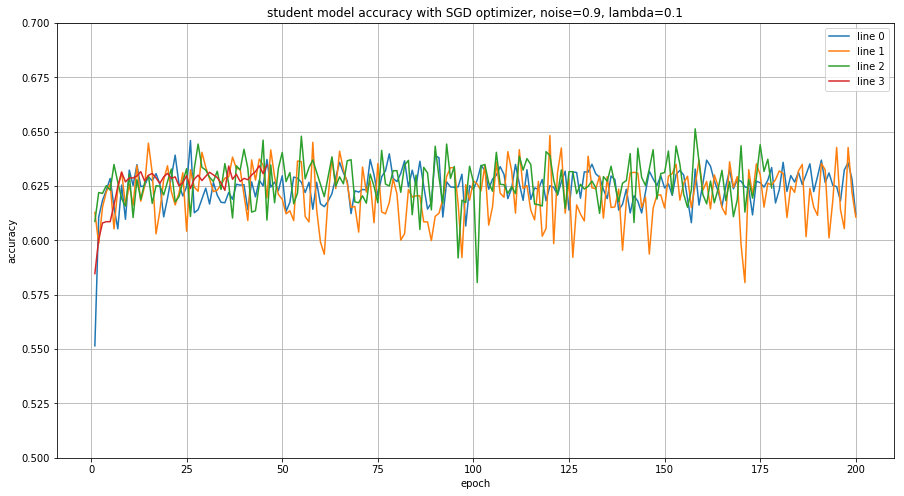

In [12]:
plt.figure(1)
dirs = 'saved_precision/student_model/'
for index in range(4):
    file = open(dirs + 'SGD_noise_0.9_lambda_0.10_accuracy_file' + str(index) + '.txt')
    lines = file.readlines()
    test_acc = []
    for i in range(1, len(lines)):
        acc = lines[i].replace('\n', '').split(',')[-1]
        test_acc.append(float(acc))
    plt.plot(np.arange(len(test_acc))+1, test_acc, label='line '+str(index))
plt.legend()
plt.grid()
plt.ylim(0.5,0.7)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('student model accuracy with SGD optimizer, noise=0.9, lambda=0.1')
plt.show()

In [ ]:
 # 创建图表1

plt.plot(np.arange(len(test_ben))+1, test_ben, '--', label='benchmark')
plt.plot(np.arange(len(test_teacher))+1, test_teacher, label='teacher model')

plt.legend()
plt.grid()
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('noise: %.1f, learning rate: %.4f'%(0.5, 0.0003), fontsize=20)
